In [ ]:
!pip install sidetable
!pip install pandas-profiling==3.3.0

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
sns.set_theme( context='talk',style='ticks',font_scale=.8,rc={'figure.figsize':(12,8)})

In [ ]:
def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

Aula: 399

In [ ]:
# VERIFICAR VALORES DUPLICADOS.
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.duplicated(keep=False).sum() #o keep é para considerar inclusive a primeira linha, além das que duplicaram dela.

160

In [ ]:
df[(df.duplicated())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Verificar quantos valores duplicados há em cada duplicata
(
    df.groupby(df.columns.tolist(), dropna=False) #tolist pq o columns traz em um formato de indices, então, colocando em lista funciona o agrupamento por linha.
    .size() #para trazer apenas o tamanho. #dropna = False, para ele trazer completo com os valores nulos tbm.
    .to_frame('n_duplicates') # para criar os itens em Data Frame
    .query('n_duplicates>1') #função para organizar os que são maiores que 1 duplicata
    .sort_values('n_duplicates',ascending=False)
    .head()
)

n_duplicates
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True             13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True             12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True              6

In [ ]:
# remover as duplicatas

df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Aula: 400 a 401

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# IDENTIFICAR VALORES NULOS
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#verificando em porcentagem.

df.isna().sum() / df.shape[0]     # coloca [0] pois queremos o valor das linhas, pois o shaape traz linahs e colunas, e precisamos somente do número de linhas.

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
df.isna().sum() / df.shape[0]  * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
df_missing = ( 
  df.isna().sum()
  .to_frame('missing_count') #para trazer as informações em formato de DF
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct')) #criou a coluna usando join, mas acho mais simples cria-la do jeito sem a função join.
  .sort_values('missing_count', ascending=False) #organizando em ordem decrescente pela coluna 'missing_count'.
)

df_missing

,missing_count,missing_pct
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


In [ ]:
df_missing.style.format('{:.2f}', subset=['missing_pct']) # essa função STYLE.FORMAT configura as colunas igual ao f'{}' do print. 
          # o subset escolhe uma coluna especifica para sofrer a alteração somente nela.

,missing_count,missing_pct
deck,688,0.77
age,177,0.20
embarked,2,0.00
embark_town,2,0.00
survived,0,0.00
pclass,0,0.00
sex,0,0.00
sibsp,0,0.00
parch,0,0.00
fare,0,0.00


In [ ]:
df_missing.style.format('{:.2%}', subset=['missing_pct']) # colocando % no lugar do f, ele já traz o valor em porcentagem.

,missing_count,missing_pct
deck,688,77.22%
age,177,19.87%
embarked,2,0.22%
embark_town,2,0.22%
survived,0,0.00%
pclass,0,0.00%
sex,0,0.00%
sibsp,0,0.00%
parch,0,0.00%
fare,0,0.00%


In [ ]:
# outra forma de fazer isso, usando a função ASSIGN.

df.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(df))).sort_values('missing_count', ascending=False)

,missing_count,missing_pct
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


In [ ]:
# Utilizando o sidetable para fazer automaticamente o que fizemos acima:

df.stb.missing()

,missing,total,percent
deck,688,891,77.216611
age,177,891,19.865320
embarked,2,891,0.224467
embark_town,2,891,0.224467
survived,0,891,0.000000
pclass,0,891,0.000000
sex,0,891,0.000000
sibsp,0,891,0.000000
parch,0,891,0.000000
fare,0,891,0.000000


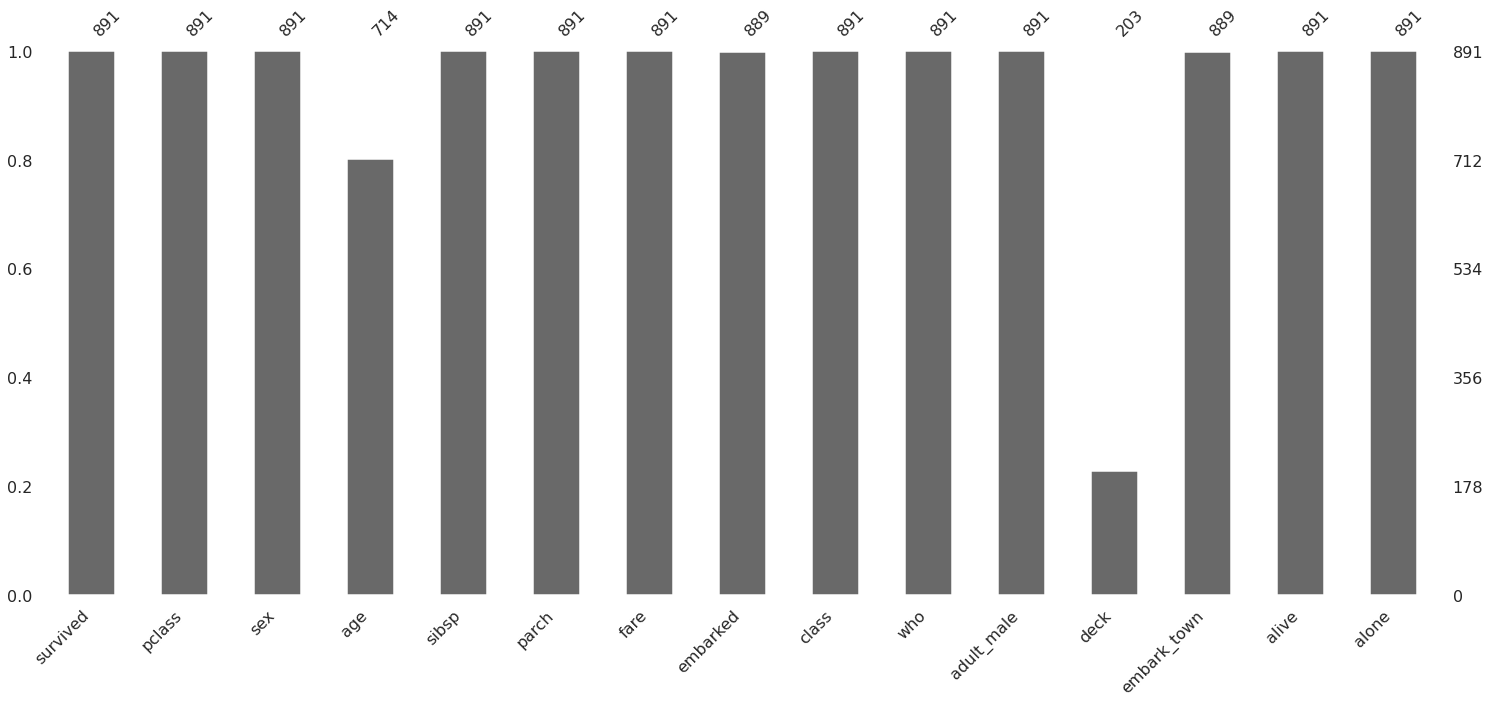

In [ ]:
# Utilizando o missgno para plotar os valores faltantes:
msno.bar(df)

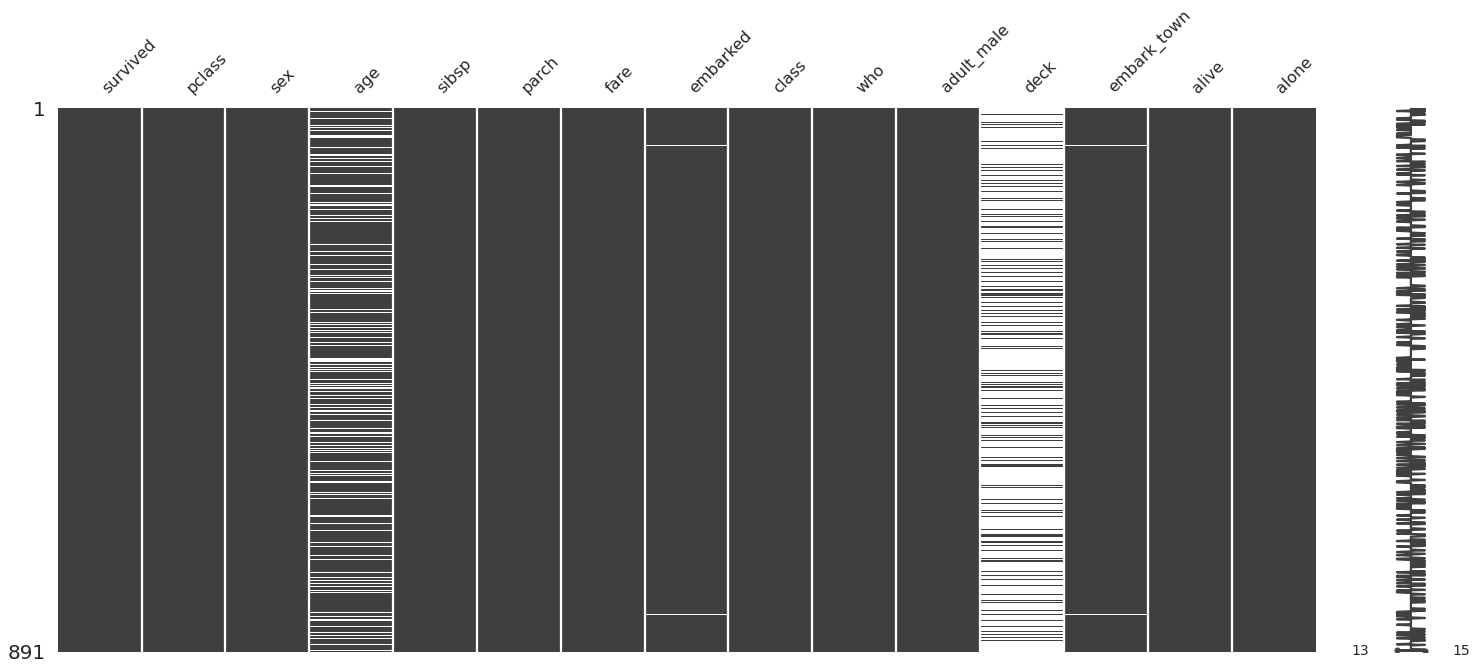

In [ ]:
msno.matrix(df)

In [ ]:
# mostrando as linhas com valores faltantes como um todo:
df[(df.isna().any(axis=1))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [ ]:
df.isna().all(axis=1) #no lugar poderia usar o any. axis = 1 pede para ver da linha, pois, por default ele observa a coluna.

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df[df.embarked.isna()] #mostrando as linhas com valores faltantes de uma coluna especifica.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


Aula 402 a 403

In [ ]:
#removendo nulos:

#df.dropna(subset=['deck']) # notamos que, se retirar todas as linhas nulas do deck, arrancam muitas linhas do data set, perde muito, fica apenas 203 rows.
# Então o ideal é arrancar a coluna, preservando o dataset com 891 rows.
df.drop(columns=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# valor máximo permitido de NAs
max_nan_freq = .7
# identificando as colunas
na_cols = df.isna().sum().div(len(df))
cols2drop = na_cols[na_cols>max_nan_freq].index
#dropando colunas com muitos NAs.
df.drop(columns=cols2drop)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# dropando inplace
df.drop(columns=cols2drop, inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
# IMPUTAR VALORES NULOS

df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
df.fillna(0).tail() #preenche todo o DataFrame.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
df.age.fillna(0).tail() #preenche uma coluna especifica.

886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, dtype: float64

In [ ]:
df.fillna({'age':0}).tail() #preenche uma coluna especifica, porém o output traz o dataFrame inteiro.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
df.fillna({'age':df.age.mean(), 'embarked':df.embarked.mode()[0]}).tail() #preencher mais colunas // o .mode do embarked é a função pra preencher com a moda.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
#df['age'] = df.age.fillna()

SyntaxError: ignored

In [ ]:
# Imputando com valores futuros, passados ou interpolação.

In [ ]:
df.fillna(method='bfill').tail() #aqui ele pega o valor futuro, ou seja, nesse caso, o valor da frente, 26, e joga pra trás. Na linha 888

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,26.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
df.fillna(method='ffill').tail() #aqui ele pega o valor passado, ou seja, nesse caso, o valor de trás, 19, e joga pra frente. Na linha 888

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,19.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
df.age.interpolate().tail()#aqui faz a interpolação na coluna especifica.

886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: age, dtype: float64

In [ ]:
(
df.assign(
    age_bfill = df.age.bfill(),
    age_ffill = df.age.ffill(),
    age_interpolate = df.age.interpolate()
)
  .filter(like='age') #essa função .filter serve para colunas e traz somente o que está de acordo com o like.
  .tail()
  .style.highlight_null('red') #função para destacar com um highlight o valor especificado.
)

,age,age_bfill,age_ffill,age_interpolate
886,27.000000,27.000000,27.000000,27.000000
887,19.000000,19.000000,19.000000,19.000000
888,nan,26.000000,19.000000,22.500000
889,26.000000,26.000000,26.000000,26.000000
890,32.000000,32.000000,32.000000,32.000000


In [ ]:
# imputando NAs por grupo.

df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

AULA 408 a 410

In [ ]:
# Tratamento de outliers

In [ ]:
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# A maneira mais direta e simples de detectar outliers é BOXPLOT

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text major ticklabel objects>)

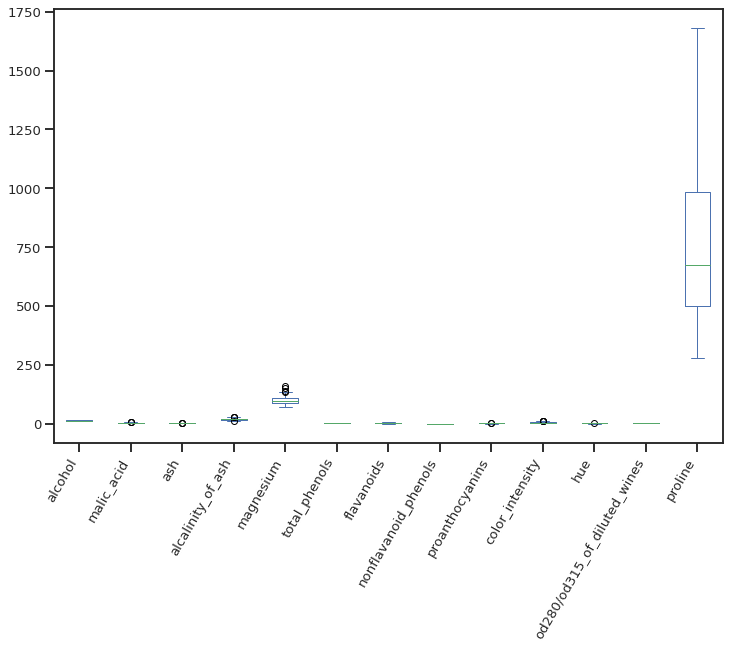

In [ ]:
df.plot.box()
plt.xticks(rotation=60, ha='right')

In [ ]:
from sklearn.preprocessing import scale

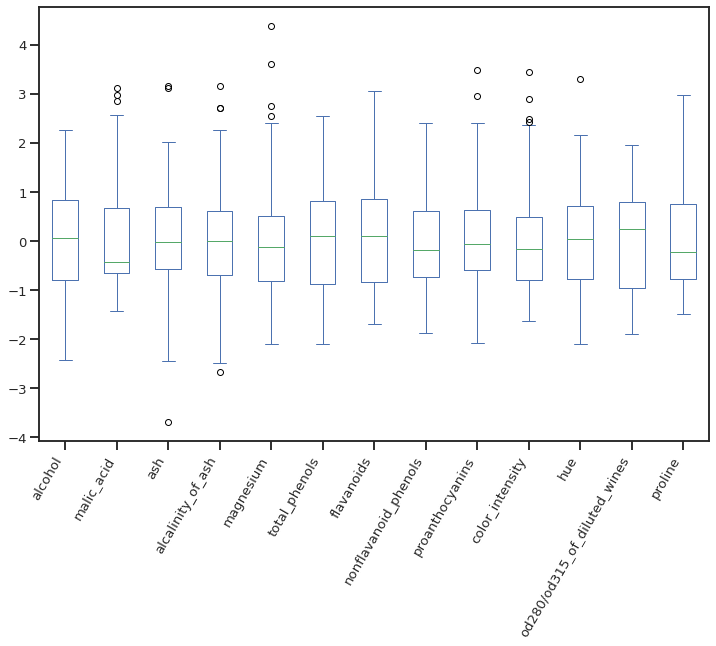

In [ ]:
df.apply(scale) # esse scale padroniza todos os dados entre a média e a variância. / ainda não entendi muito bem. - toda média virou 0 e desvio padrão 1.
# o apply faz a função funcionar para todas as colunas./ entã oo apply está usando o scale em todas as colunas.

df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1
  
  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
is_outlier(df.ash) # Mostrando aplicação da função em uma coluna.

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: ash, Length: 178, dtype: bool

In [ ]:
is_outlier(df.ash).sum() # Calculando a quantidade.

3

In [ ]:
# Mostrando a aplicação da função em todas as colunas numéricas contínuas.
df.apply(is_outlier)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.apply(is_outlier).sum() #verificando as somas por coluna tbm.

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
# Removendo os outliers - todas as linhas que tenham ao menos 1 outliers.

In [ ]:
df[df.apply(is_outlier).any(axis=1)] # filtro que traz os outliers.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0


In [ ]:
df[~df.apply(is_outlier).any(axis=1)] # filtro que traz os que não são outliers.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


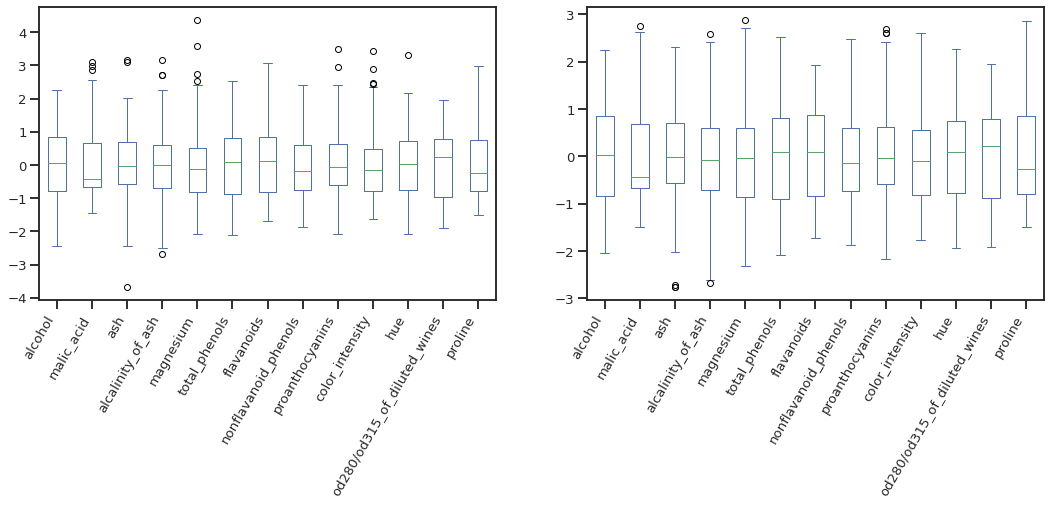

In [ ]:
# Figura lado a lado dos dados originais e padronizados.

df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0])
df_without_outliers.apply(scale).plot.box(ax=axes[1])

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()


In [ ]:
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]
df_without_outliers.apply(is_outlier).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               2
magnesium                       1
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 3
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

AULAS 411 a 412

In [ ]:
# CORRIGINDO OUTLIERS

In [ ]:
df.describe(percentiles=[.01,.25,.5,.75,.9,.99]) #mostrando percentis

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [ ]:
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()
  
  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)
  
  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile
  
  return array

In [ ]:
# mostrando percentis após aplicar função.
cap_values(df.ash).max()

3.23

In [ ]:
cap_values(df.ash, upper_quantile=.90).max()

2.7

In [ ]:
# tornando os maiores valores nos valores máximos do quantil.

In [ ]:
df.apply(cap_values, upper_quantile=.99).describe(percentiles=[.01,.25,.5,.75,.9,.99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.292089,2.021252,0.361685,1.586445,5.042848,0.955729,2.610371,745.869213
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.618829,0.979667,0.124067,0.559125,2.272948,0.223969,0.707571,312.129198
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.409044,5.517406,2.935870,28.500000,139.634800,3.537457,3.759522,0.630000,2.976928,10.850255,1.421587,3.825290,1516.692800


In [ ]:
#nota-se que os valores máximos estão diferentes do df antes de usar a função, pois foi ajustado de acordo com o objetivo da função.

In [ ]:
#agora transformação tipo log.

In [ ]:
np.log(df.ash) # o log de uma coluna

0      0.887891
1      0.760806
2      0.982078
3      0.916291
4      1.054312
         ...   
173    0.896088
174    0.908259
175    0.815365
176    0.862890
177    1.007958
Name: ash, Length: 178, dtype: float64

In [ ]:
df.apply(np.log)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.655352,0.536493,0.887891,2.747271,4.844187,1.029619,1.118415,-1.272966,0.828552,1.729884,0.039221,1.366092,6.970730
1,2.580217,0.576613,0.760806,2.415914,4.605170,0.974560,1.015231,-1.347074,0.246860,1.477049,0.048790,1.223775,6.956545
2,2.577182,0.858662,0.982078,2.923162,4.615121,1.029619,1.175573,-1.203973,1.033184,1.736951,0.029559,1.153732,7.077498
3,2.665143,0.667829,0.916291,2.821379,4.727388,1.348073,1.249902,-1.427116,0.779325,2.054124,-0.150823,1.238374,7.299797
4,2.583243,0.951658,1.054312,3.044522,4.770685,1.029619,0.989541,-0.941609,0.598837,1.463255,0.039221,1.075002,6.599870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.618125,1.731656,0.896088,3.020425,4.553877,0.518794,-0.494296,-0.653926,0.058269,2.041220,-0.446287,0.553885,6.606650
174,2.595255,1.363537,0.908259,3.135494,4.624973,0.587787,-0.287682,-0.843970,0.343590,1.987874,-0.356675,0.444686,6.620073
175,2.585506,1.453953,0.815365,2.995732,4.787492,0.463734,-0.371064,-0.843970,0.300105,2.322388,-0.527633,0.444686,6.727432
176,2.577942,0.951658,0.862890,2.995732,4.787492,0.500775,-0.385662,-0.634878,0.378436,2.230014,-0.510826,0.482426,6.733402


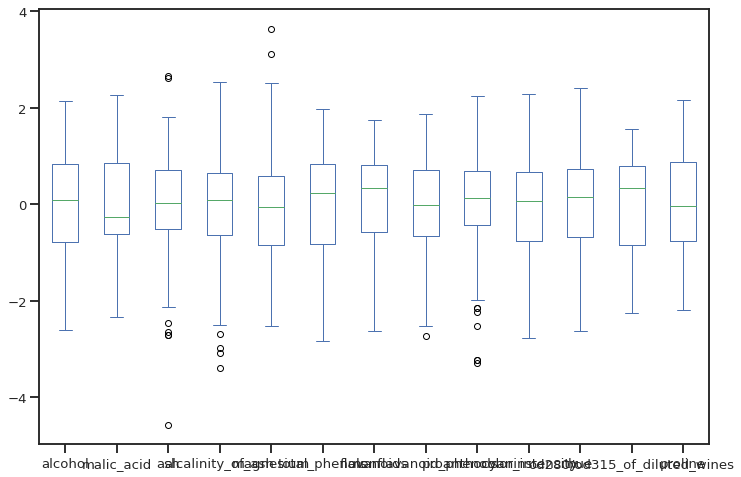

In [ ]:
df.apply(np.log).apply(scale).plot.box()

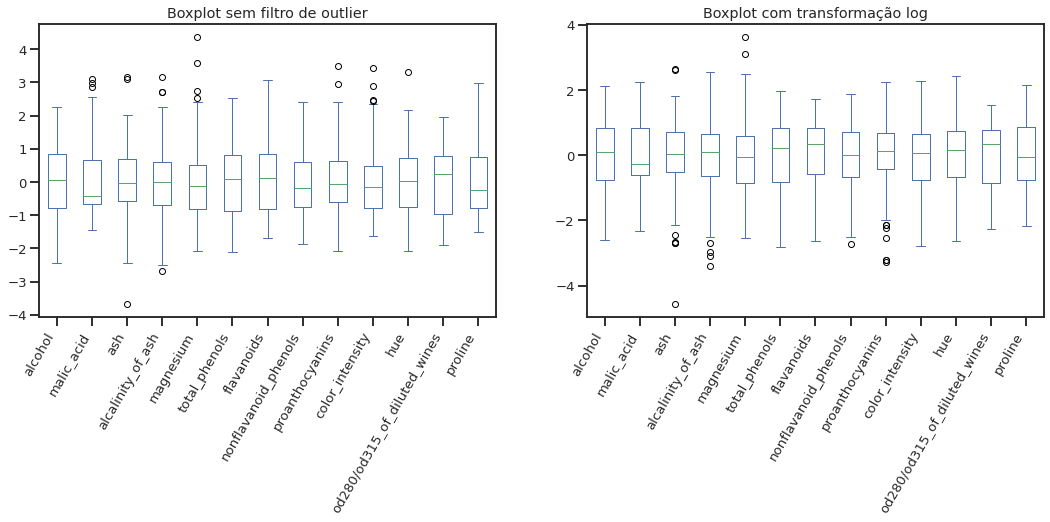

In [ ]:
# Figura lado a lado dos dados originais e padronizados destacando 3 std

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Boxplot com transformação log')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

In [ ]:
# agora transformação box-cox

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
power_transform(df[['ash']], method='box-cox')

In [ ]:
pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.529934,-0.419936,0.209656,-1.180096,1.690664,0.820429,1.017090,-0.590039,1.196442,0.448300,0.373318,1.995073,1.062489
1,0.238692,-0.324973,-0.840423,-2.662695,0.188122,0.594628,0.752148,-0.788009,-0.485294,-0.106644,0.416623,1.143947,1.029691
2,0.189069,0.313578,1.120488,-0.243599,0.261441,0.820429,1.172735,-0.402165,1.932988,0.463965,0.329965,0.782435,1.307819
3,1.707400,-0.112964,0.471514,-0.799368,1.020309,2.307762,1.385166,-0.997460,1.031657,1.175730,-0.414883,1.223784,1.810015
4,0.288354,0.513388,1.906875,0.472325,1.281944,0.820429,0.689251,0.344871,0.465369,-0.136613,0.373318,0.415598,0.188997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.874837,2.000792,0.284148,0.325346,-0.206825,-0.980400,-1.501774,1.226708,-0.921725,1.146438,-1.404927,-1.225265,0.205267
174,0.487399,1.338849,0.396374,1.049814,0.333017,-0.772423,-1.319936,0.636572,-0.242658,1.025641,-1.131521,-1.443607,0.237447
175,0.325627,1.507756,-0.412835,0.177260,1.379224,-1.139458,-1.396657,0.636572,-0.353385,1.791258,-1.635008,-1.443607,0.493227
176,0.201471,0.513388,-0.012245,0.177260,1.379224,-1.033115,-1.409612,1.287532,-0.151934,1.577893,-1.588819,-1.371826,0.507368


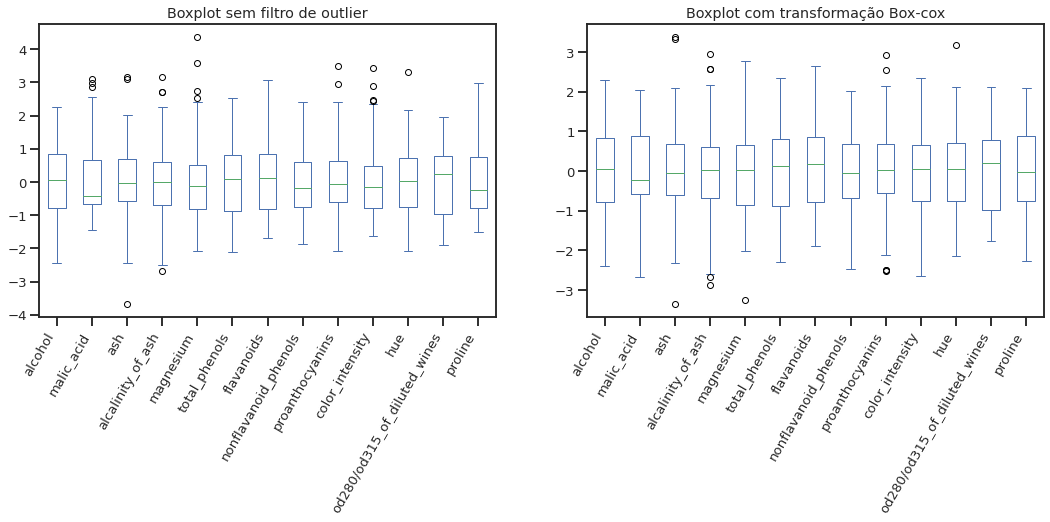

In [ ]:
df_boxbox = pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_boxbox.plot.box(ax=axes[1], title='Boxplot com transformação Box-cox')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

AULA 413 a 414

In [ ]:
# TRATANDO DATAS

In [ ]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities']).dropna()
print(df.shape)
df.head()

(5256, 2)


,Date,Fatalities
0,09/17/1908,1.0
1,07/12/1912,5.0
2,08/06/1913,1.0
3,09/09/1913,14.0
4,10/17/1913,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Fatalities  5256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.2+ KB


In [ ]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'],parse_dates=['Date']).dropna()
print(df.shape)
df.head()

(5256, 2)


,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


In [ ]:
df.info() #notamos que a função parse_dates do pandas, já na leitura dos dados, converteu de object para datetime.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [ ]:
# outro modo:

In [ ]:
pd.to_datetime(df.Date)

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [ ]:
# outro modo:

df['Date'].astype('datetime64[ns]') #com essa conseguiria mudar mais de uma coluna ao mesmo tempo de uma vez.

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [ ]:
# para dataset grande, costuma ser mais rápido esse modelo:
pd.to_datetime(df['Date'], format='%m/%d/%Y')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [ ]:
# Mostrando atributos e funções do Método dt

In [ ]:
print(list_attributes(df['Date'].dt))  #funciona com coluna que já está em formato de datetime.

['ceil', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'floor', 'freq', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'microsecond', 'minute', 'month', 'month_name', 'nanosecond', 'normalize', 'quarter', 'round', 'second', 'strftime', 'time', 'timetz', 'to_period', 'to_pydatetime', 'tz', 'tz_convert', 'tz_localize', 'week', 'weekday', 'weekofyear', 'year']


In [ ]:
df['Date'].dt.day_name()

0        Thursday
1          Friday
2       Wednesday
3         Tuesday
4          Friday
          ...    
5263    Wednesday
5264      Tuesday
5265       Monday
5266       Sunday
5267       Monday
Name: Date, Length: 5256, dtype: object

In [ ]:
df_index = df.set_index('Date').sort_index() # criando um novo df com as datas como indice para facilitar consultas.
df_index

,Fatalities
Date,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [ ]:
#e ae fazer um filtro de tal data a tal data, com o loc que consulta pelos index.
df_index.loc['2000':'2003']

,Fatalities
Date,
2000-01-05,1.0
2000-01-10,10.0
2000-01-13,22.0
2000-01-15,5.0
2000-01-25,4.0
...,...
2003-11-29,20.0
2003-12-16,2.0
2003-12-18,3.0


In [ ]:
df_index.loc['2000-05-10':'2003-08'] # outro exemplo de filtrar por datas.

,Fatalities
Date,
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
2000-05-25,1.0
2000-05-25,1.0
...,...
2003-08-04,2.0
2003-08-08,1.0
2003-08-20,20.0


In [ ]:
# Agrupando por ano e somando as fatalidades.
df_index.resample('M').sum() #resample serve pra fazer agrupamento das datas. - O M indica que quer pegar a soma para cada mês - M = Mês

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0
...,...
2009-02-28,102.0
2009-03-31,44.0
2009-04-30,65.0


In [ ]:
df[(df['Date'] < '2000')]

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0
...,...,...
4684,1999-12-22,4.0
4685,1999-12-24,1.0
4686,1999-12-25,22.0
4687,1999-12-25,10.0


In [ ]:
df[(df['Date'].dt.month == '05')]

,Date,Fatalities


In [ ]:
df_index.loc['2000-05':'2002'] # vai do primeiro registro de Maio de 2000 até o último de 2002

,Fatalities
Date,
2000-05-02,2.0
2000-05-03,1.0
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
...,...
2002-12-21,2.0
2002-12-23,44.0
2002-12-25,1.0


Aula 415 - Rolling Filters

In [ ]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0


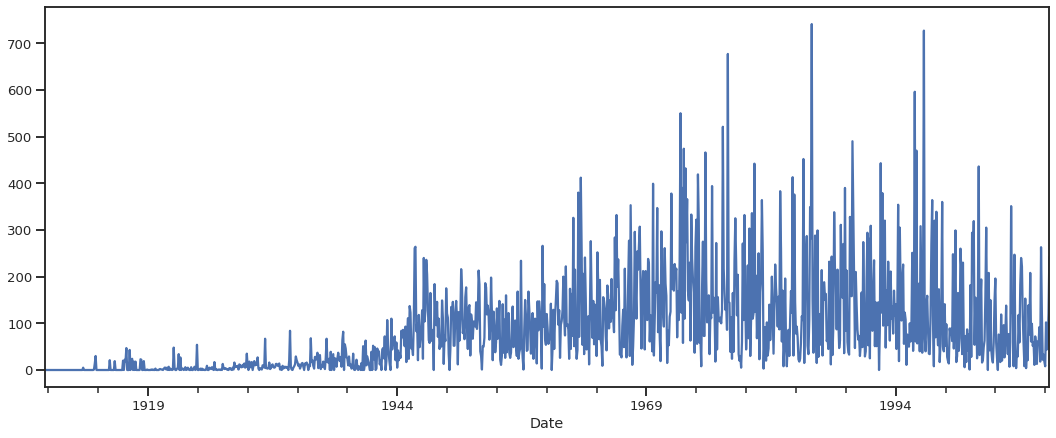

In [ ]:
plt.figure(figsize=(18,7))
df_monthly.Fatalities.plot();

In [ ]:
df_monthly.Fatalities.rolling(3).mean()

Date
1908-09-30           NaN
1908-10-31           NaN
1908-11-30      0.333333
1908-12-31      0.000000
1909-01-31      0.000000
                 ...    
2009-02-28     42.666667
2009-03-31     51.333333
2009-04-30     70.333333
2009-05-31     76.333333
2009-06-30    142.333333
Freq: M, Name: Fatalities, Length: 1210, dtype: float64

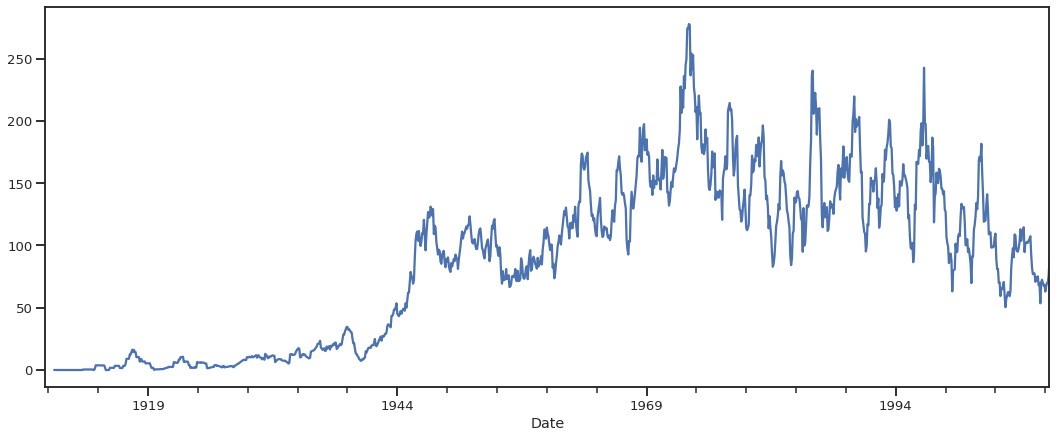

In [ ]:
plt.figure(figsize=(18,7))
df_monthly.Fatalities.rolling(12).mean().plot(); # Utilizando o Rolling que são médias móveis

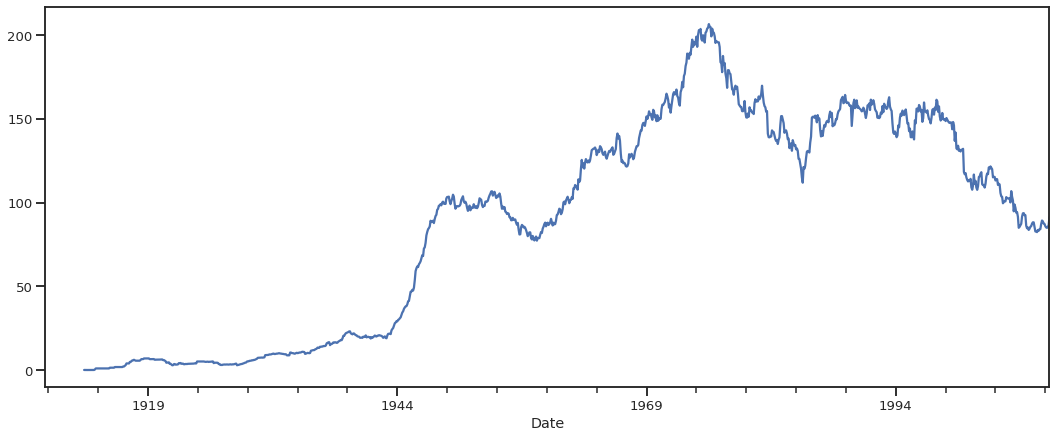

In [ ]:
plt.figure(figsize=(18,7))
df_monthly.Fatalities.rolling(48).mean().plot(); # Utilizando o Rolling que são médias móveis

In [ ]:
def rolling_mean(window_size): # criando a função que realiza essa tarefa, nos dando a escolha apenas do período da média.
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

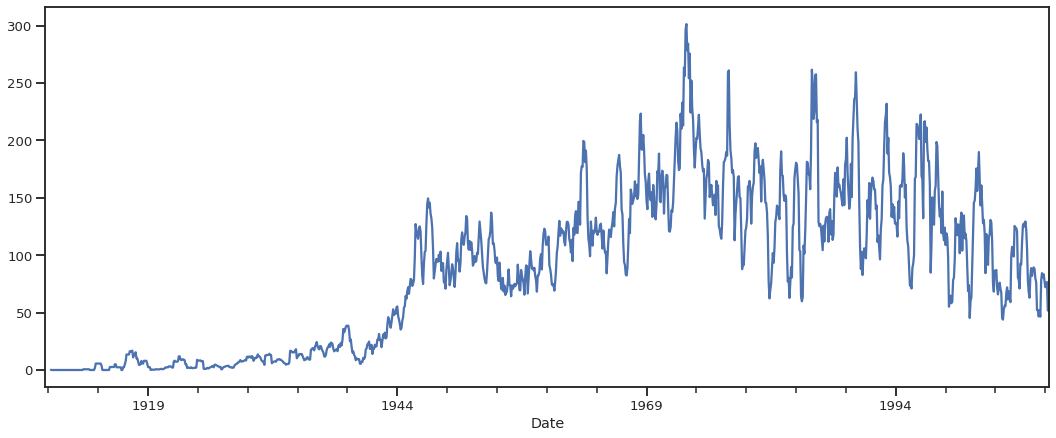

In [ ]:
rolling_mean(8)

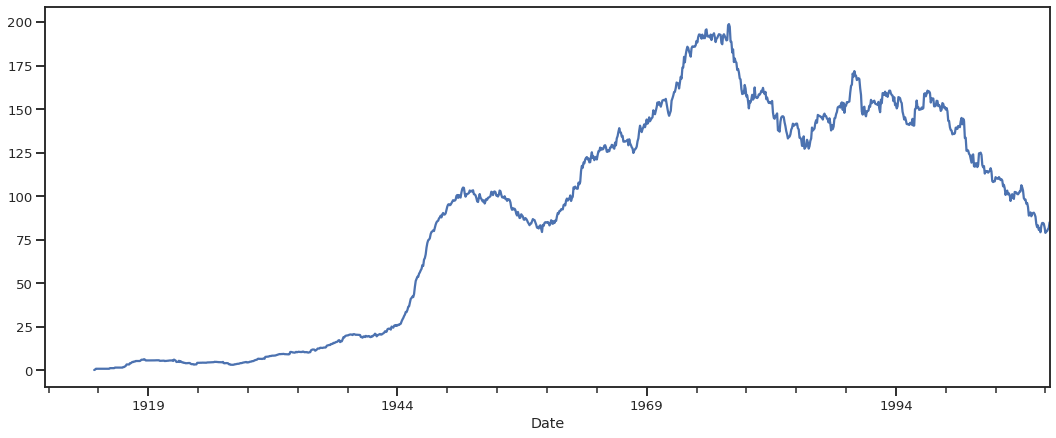

In [ ]:
rolling_mean(60)

In [ ]:
@interact(window_size=(12,121,12)) # decorator para interação, usando tupla ele fica arrastando
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(IntSlider(value=60, description='window_size', max=121, min=12, step=12), Output()), _do…

In [ ]:
@interact(window_size=(range(12,121,12))) # decorator para interação, escolhendo da lista.
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(Dropdown(description='window_size', options=(12, 24, 36, 48, 60, 72, 84, 96, 108, 120), …